## Object detection using colour Workshop
By Laura Madrid :)
***

#### The goal of this workshop is to introduce you to the world of Computer Vision thorough a small but powerful application: object detection through colour

In [16]:
# Imports needed for the tasks
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import cv2

**Step 1**: Create HSV Value Ranges

In [17]:
# STEP 1 : Create HSV Value ranges
# Our images (assorted.jpg, grouped.jpeg) have m&m's in the following colours:
# yellow, orange, red, green, blue, brown

# Red color range
red_lower = np.array([0, 100, 100])
red_upper = np.array([5, 255, 255])

# Orange color range
orange_lower = np.array([1, 190, 200])
orange_upper = np.array([18, 255, 255])

# Yellow color range
yellow_lower = np.array([20, 100, 100])
yellow_upper = np.array([35, 255, 255])

# Green color range
green_lower = np.array([40, 50, 100])
green_upper = np.array([90, 255, 255])

# Blue color range
blue_lower = np.array([95, 50, 50])
blue_upper = np.array([120, 255, 255])

# Brown color range
brown_lower = np.array([0, 50, 10])
brown_upper = np.array([30, 255, 150])


In [18]:
# You can use this function to get an idea of the colours that your range will cover
def visualize_hsv_range(hsv_lower, hsv_upper):
    hue_values = np.linspace(hsv_lower[0], hsv_upper[0], 100)  # Creating a range of hue values
    saturation = hsv_upper[1]  # Keeping the saturation constant
    value = hsv_upper[2]  # Keeping the value constant

    # Generating an HSV spectrum using the hue range and constant saturation/value
    hsv_spectrum = np.array([[hue, saturation, value] for hue in hue_values], dtype=np.uint8)
    # Converting the HSV spectrum to RGB for visualization
    rgb_spectrum = cv2.cvtColor(np.reshape(hsv_spectrum, (1, -1, 3)), cv2.COLOR_HSV2RGB)
    # Reshaping the RGB spectrum for plotting
    rgb_spectrum = np.reshape(rgb_spectrum, (1, -1, 3))

    plt.imshow(rgb_spectrum)
    plt.xlabel("Hue")
    plt.ylabel("Sat & Val") # Saturation and Value
    plt.title("HSV Color Range")
    plt.show()

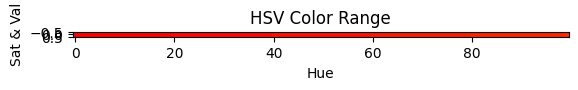

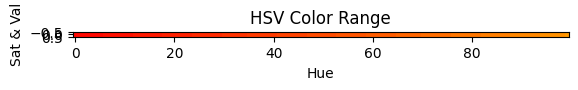

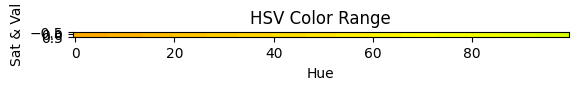

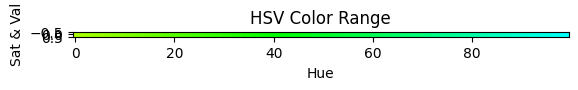

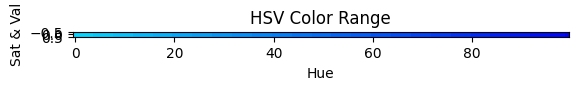

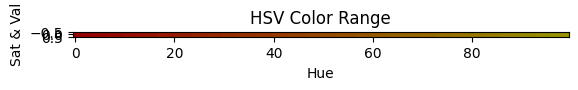

In [19]:
visualize_hsv_range(red_lower, red_upper)
visualize_hsv_range(orange_lower, orange_upper)
visualize_hsv_range(yellow_lower, yellow_upper)
visualize_hsv_range(green_lower, green_upper)
visualize_hsv_range(blue_lower, blue_upper)
visualize_hsv_range(brown_lower, brown_upper)

**Step 2**: Get colour masks 

In [5]:
def identify_candies(image):
    # Convert the image from BGR to HSV(hue-saturation-value)
    # to get the colour masks
    hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Get colour masks
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
    orange_mask = cv2.inRange(hsvFrame, orange_lower, orange_upper)
    yellow_mask = cv2.inRange(hsvFrame, yellow_lower, yellow_upper)
    green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)
    blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)
    brown_mask = cv2.inRange(hsvFrame, brown_lower, brown_upper)

    # Find contours for each color mask
    red_contours, _ = cv2.findContours(red_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    orange_contours, _ = cv2.findContours(orange_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    yellow_contours, _ = cv2.findContours(yellow_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    green_contours, _ = cv2.findContours(green_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    blue_contours, _ = cv2.findContours(blue_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    brown_contours, _ = cv2.findContours(brown_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    return red_contours, orange_contours, yellow_contours, green_contours, blue_contours, brown_contours

**Step 3**: Visualize mask contours

In [20]:
def visualize_contours(original_image, contours):
    # Overlay contours on the original image
    image_with_contours = original_image.copy()

    # Draw contours for each color
    cv2.drawContours(image_with_contours, contours[0], -1, (0, 0, 255), 2)    # Red contours
    cv2.drawContours(image_with_contours, contours[1], -1, (0, 165, 255), 2)  # Orange contours
    cv2.drawContours(image_with_contours, contours[2], -1, (0, 255, 255), 2)  # Yellow contours
    cv2.drawContours(image_with_contours, contours[3], -1, (0, 255, 0), 2)    # Green contours
    cv2.drawContours(image_with_contours, contours[4], -1, (255, 0, 0), 2)    # Blue contours
    cv2.drawContours(image_with_contours, contours[5], -1, (42, 42, 165), 2)  # Brown contours

    # Convert BGR image to RGB (for displaying with pyplot)
    image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

    # Display the original image and the image with contours side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    axes[1].imshow(image_with_contours_rgb)
    axes[1].axis('off')
    axes[1].set_title('Image with Contours')
    plt.show()

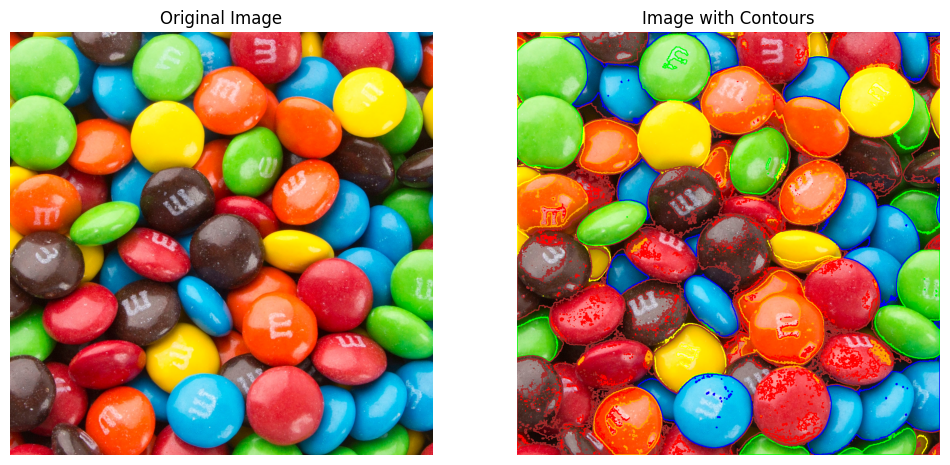

In [21]:
image_path = "assorted.jpg"
image = cv2.imread(image_path)
contours = identify_candies(image)
visualize_contours(image, contours)

**Step 4**: Improve visualization

In [22]:
def visualize_boxes(original_image, contours, box_size):
    # Overlay contours on the original image
    image_with_contours = original_image.copy()

    # Draw bounding boxes for each contour
    # colors are defined as : red, orange, green, blue, brown in BGR values
    colors = [(0, 0, 255), (0, 165, 255), (0, 255, 255), (0, 255, 0), (255, 0, 0), (33, 67, 101)]
    for i, color_contours in enumerate(contours):
        for contour in color_contours:
            # Calculate the area of the contour
            area = cv2.contourArea(contour)
            # Only draw the bounding box if the contour area is above the threshold
            if area > box_size:
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), colors[i], 2)

    # Convert BGR image to RGB (for displaying with pyplot)
    image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

    # Display the original image and the image with contours side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    axes[1].imshow(image_with_contours_rgb)
    axes[1].axis('off')
    axes[1].set_title('Image with Contours and Bounding Boxes')
    plt.show()

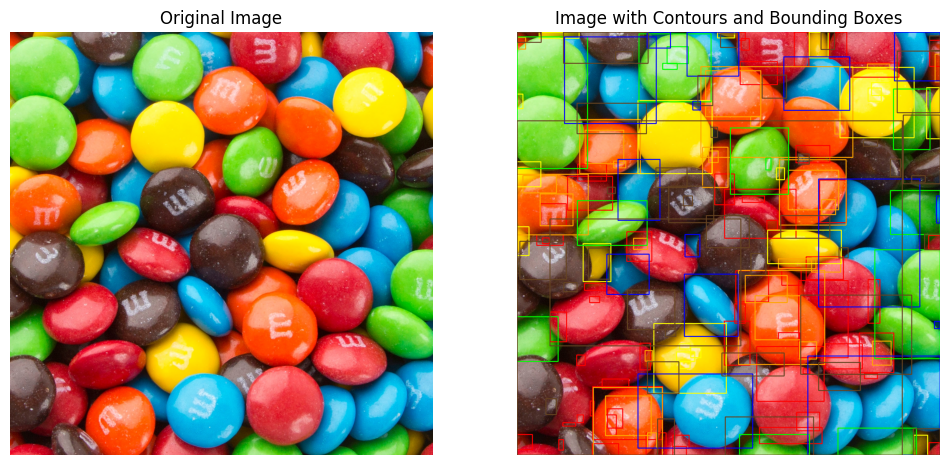

In [23]:
image_path = "assorted.jpg"
image = cv2.imread(image_path)
contours = identify_candies(image)
visualize_boxes(image, contours, 150)

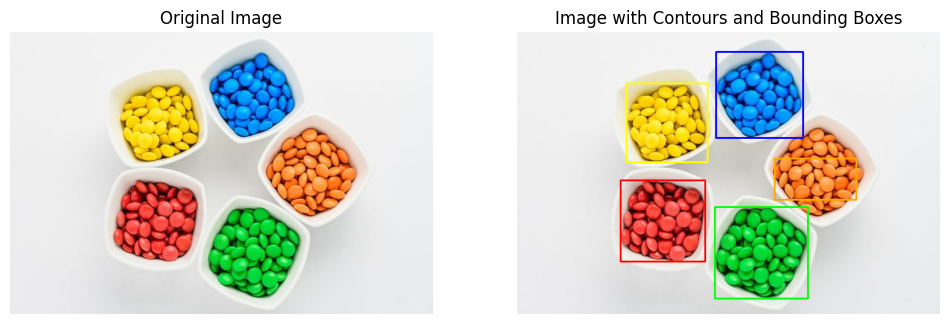

In [9]:
image_path = "grouped.jpeg"
image = cv2.imread(image_path)
contours = identify_candies(image)
visualize_boxes(image, contours, 1000)

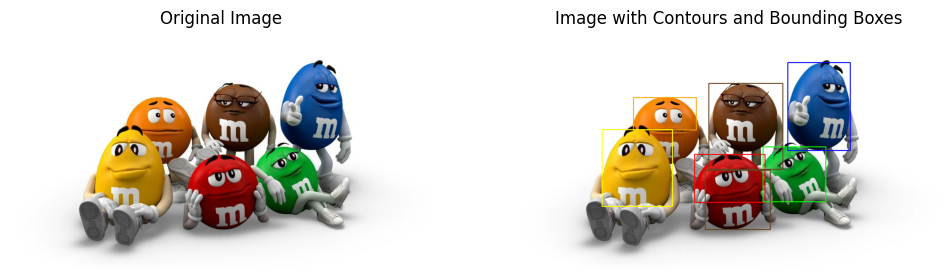

In [10]:
image_path = "singlemm.jpg"
image = cv2.imread(image_path)
contours = identify_candies(image)
visualize_boxes(image, contours, 12000)

## We are now ready to play a version of punch-buggy!!!
#### Instructions: call out the yellow cars on the road :)
Why try to detect the yellow cars on the road yourself when you can apply the computer vision technique we learned today ?

In [24]:
def detect_color_cars(image, lower_range, upper_range, box_size=100):
    # Step 1: Convert the image from BGR to HSV (hue-saturation-value)
    hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Step 2: Create a mask for the specified color range
    color_mask = cv2.inRange(hsvFrame, lower_range, upper_range)

    # Step 3: Find contours for objects within the color range
    color_contours, _ = cv2.findContours(color_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Step 4: Overlay contours on the original image
    image_with_contours = image.copy()

    # Step 5: Draw bounding boxes for detected contours
    for contour in color_contours:
        # Calculate the area of the contour
        area = cv2.contourArea(contour)
        # Only draw the bounding box if the contour area is above the specified threshold
        if area > box_size:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Step 6: Convert BGR image to RGB (for displaying with pyplot)
    image_with_contours_rgb = cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB)

    # Step 7: Display the original image and the image with detected contours and bounding boxes
    # TIP: If you wanted to keep track of specific coloured cars ...
    #      you would have a live video and run this function on each frame of the video
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].axis('off')
    axes[0].set_title('Original Image')
    axes[1].imshow(image_with_contours_rgb)
    axes[1].axis('off')
    axes[1].set_title('Detected Cars')
    plt.show()

#### Detect the yellow car !

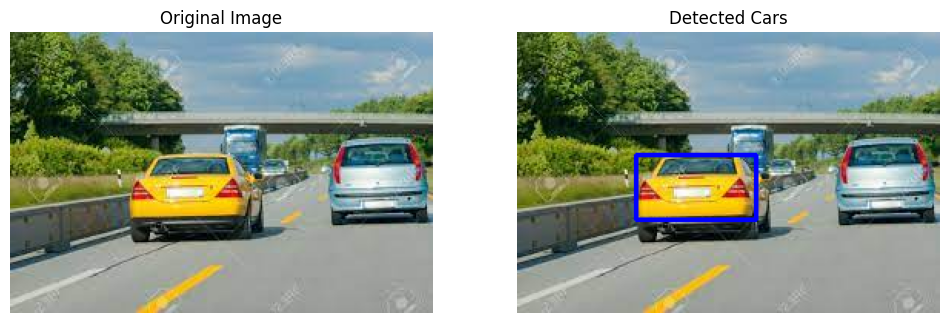

In [26]:
image_path = "yellow_car.jpg"
image = cv2.imread(image_path)

yellow_lower = np.array([20, 100, 100])
yellow_upper = np.array([30, 255, 255])

box_size = 600
detect_color_cars(image, yellow_lower, yellow_upper, box_size)